In [112]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble, visualization
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi,random
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

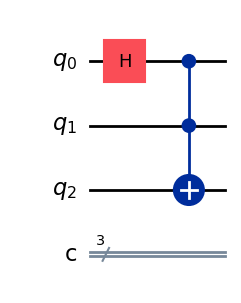

In [116]:

# 3-qubit circuit (q0..q2). Apply H on q0, then CNOT with control q1 and target q3.
qc = QuantumCircuit(3,3)
qc.h(0)
qc.ccx(0,1, 2)

# show circuit
display(qc.draw('mpl'))

In [114]:
# Add classical registers for storing the measurement results
cr = ClassicalRegister(3, 'r')
qc.add_register(cr)

In [ ]:
sim = AerSimulator()
 # Run simulator
result = sim.run(qc).result()
counts = result.get_counts()
counts

{'000 000': 493, '001 000': 531}

In [83]:
import numpy as np


# Define a function to normalize an input list
def normalize_list(input_list):
    if len(input_list) != 3:
        raise ValueError("Input list must have length 3.")
    norm = np.linalg.norm(input_list)
    return [x / norm for x in input_list]


In [ ]:

# Measure the qubits and store the results in the classical register
for i in range(3):
    qc.measure([i], cr[i])

# Define a function to execute the circuit for given input and plot the results
def run_and_plot(input_list):
    sim = AerSimulator()
    counts = {}
    for i in range(len(input_list)):
        qc.initialize(normalize_list(input_list[i]))  # Initialize qubits with different states
        result = sim.run(qc).result()
        counts[tuple(input_list[i][::-1])] = result.get_counts(qc)

    fig, ax = plt.subplots()
    for key, value in counts.items():
        ax.bar(key, value.values(), width=0.4)
        ax.set_xticks(list(counts.keys()))
        ax.set_xticklabels([f"|{x[2]}{x[1]}{x[0]}>" for x in counts.keys()])
        ax.legend(counts.values())
    plt.show()

# # # Change the input list to define the number of input combinations you want to check and plot
input_list = [[1j, -1j, 1], [1, 0, 0], [-1j, 1j, 1],[-1j,1j,1]]
run_and_plot(input_list)

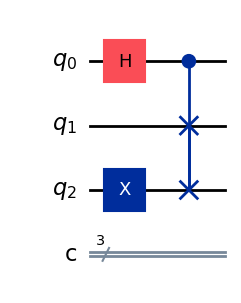

In [103]:

# 3-qubit circuit (q0..q3). Apply H on q0, then CNOT with control q1 and target q3.
qc = QuantumCircuit(3,3)
qc.h(0)
qc.x(2)
# Add a CNOT gate between qubits 0 and 2, but since we want to measure the Bell state, use the SWAP operation instead
# This will swap the states of qubits 0 and 2 without affecting qubit 1
qc.cswap(0,1,2)
#qc.swap(1, 2)


# show circuit
display(qc.draw('mpl'))

In [104]:
# Add classical registers for storing the measurement results
cr = ClassicalRegister(3, 'r')
qc.add_register(cr)


In [ ]:
sim = AerSimulator()
 # Run simulator
result = sim.run(qc).result()
counts = result.get_counts()
counts

{'000 000': 493, '001 000': 531}

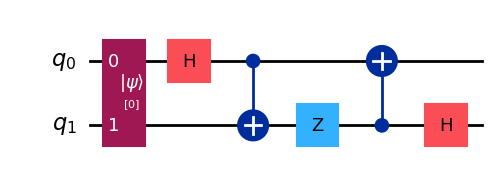

In [49]:
qc = QuantumCircuit(2)
# Initialize the first qubit in state |0> and the second qubit in state |1>
qc.initialize(0,[0,1])

# Apply H gate to qubit 0
qc.h(0)

# Apply CNOT gate from qubit 0 (control) to qubit 1 (target)
qc.cx(0, 1)

# Apply Z gate to qubit 1
qc.z(1)

# Apply CNOT gate from qubit 1 (control) to qubit 0 (target)
qc.cx(1, 0)

# Apply H gate to qubit 1
qc.h(1)
display(qc.draw('mpl'))

The given circuit you provided performs a combination of Hadamard (H), Phase (Z), and Controlled NOT (CNOT) gates on two qubits, but the specific operation depends on the order of compositions.

If we analyze this circuit step-by-step:

1. `qc.initialize(0, 1)` initializes the first qubit in state |0⟩ and the second qubit in state |1⟩.

2. `qc.h(0)` applies a Hadamard gate to the first qubit, which introduces equal superpositions of the computational basis states for that qubit.

3. `qc.cx(0, 1)` performs a CNOT operation from the first qubit (control) to the second qubit (target). If the control qubit is in state |0⟩, it doesn't affect the target; if it is in state |1⟩, it flips 
the state of the target.

4. `qc.z(1)` applies a Z gate to the second qubit, which adds an additional phase factor (-1) if the qubit is in state |1⟩.

5. `qc.cx(1, 0)` performs another CNOT operation from the second qubit (control) to the first qubit (target). Now, since the second qubit has been modified by the previous operations, this CNOT gate 
introduces an additional phase (-1) if the initial state of the first qubit was |1⟩.

6. `qc.h(1)` applies a Hadamard gate to the second qubit, which brings it back into equal superpositions of computational basis states.

In summary, this circuit performs a controlled phase operation on the two-qubit state based on the initial state of the first qubit and the order of compositions is crucial for obtaining the desired 
result. The specific transformation depends on the combination of gates applied and their order. If the order was different, the resulting circuit would perform a different quantum operation.